In [1]:
import math
import random
import numpy as np

In [2]:
def rn(p1):
    return random.random() <= p1

In [3]:
def change(cur, cp1, cp2, t):
    if cur == 1 and cp1 >= cp2:
        return 1
    elif cur == 2 and cp2 >= cp1:
        return 2
    else:
        diff = abs(cp2 - cp1)
        if (random.random() <= diff ** t):
            return 3 - cur
        else:
            return cur

In [4]:
def func(summax, p1, p2):
    count_1, count_2 = 0, 0
    win_1, win_2 = 0, 0
    
    fl_win, fl_lose = False, False 
    while not fl_win and not fl_lose:
        if rn(p1):
            fl_win = True;
            count_1 += 1
            win_1 += 1
        else:
            fl_lose = True
            count_1 += 1
    
    fl_win, fl_lose = False, False 
    while not fl_win and not fl_lose and count_1 + count_2 < summax:
        if rn(p2):
            fl_win = True;
            count_2 += 1
            win_2 += 1
        else:
            fl_lose = True
            count_2 += 1
            
    cnt = summax - count_1 - count_2        
    current_probability_1 = win_1 / count_1
    current_probability_2 = win_2 / count_2
    
    temp = 1
    for i in range(cnt):
        num = random.randint(1, 2)
        res = change(num, current_probability_1, current_probability_2, temp)
        if (res == 1):
            count_1 += 1
            if rn(p1):
                win_1 += 1
        else:
            count_2 += 1
            if rn(p2):
                win_2 += 1
        temp *= 0.9
        current_probability_1 = win_1 / count_1
        current_probability_2 = win_2 / count_2
        
    return win_1 + win_2  


In [5]:
func(150, 0.1, 0)

16

In [9]:
import numpy as np
import time
import os
import sys
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def max(a, b):
    if (a >= b):
        return(a)
    else:
        return(b)

games = 50
summax = 150    
    
fig = plt.figure(figsize=(6.5,4.2))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$p_1$')    
ax.set_ylabel('$p_2$')
ax.set_zlabel('$total$')

a = '$algo_1$ and $Metropolis-algo$, $h = {0}$, $games = {1}$'.format(summax, games)
ax.set_title(a)

def algo1(summax, p1, p2, a):   
    w1 = 0
    w2 = 0
    b1 = 0
    b2 = 0
    b = np.zeros((summax, 2))
    i = 0
    while i < summax:
        if (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][b2][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][b2][w2] >= (w2 + 1)/(b2 + 2)*(1 + a[b1][w1][b2 + 1][w2 + 1]) + (b2 - w2 + 1)/(b2 + 2)*a[b1][w1][b2 + 1][w2]:
            b1 = b1 + 1
            x = random.random()
            if x <= p1:
                w1 = w1 + 1
        else:
            b2 = b2 + 1
            x = random.random()
            if x <= p2:
                w2 = w2 + 1
        i = i + 1
    total = w1 + w2
    return(total)

a = np.zeros((summax + 1, summax + 1, summax + 1, summax + 1))
s = summax - 1
while s >= 0:
    b1 = 0
    while b1 <= s:
        w1 = 0
        while w1 <= b1:
            w2 = 0
            while w2 <= s - b1:
                a[b1][w1][s - b1][w2] = max( (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][s - b1][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][s - b1][w2],
                        (w2 + 1)/(s - b1 + 2)*(1 + a[b1][w1][s - b1 + 1][w2 + 1]) + (s - b1 - w2 + 1)/(s - b1 + 2)*a[b1][w1][s - b1 + 1][w2])
                w2 = w2 + 1
            w1 = w1 + 1
        b1 = b1 + 1
    s = s - 1 

games = 50
summax = 150

def error(t, size):
    average = t.mean()
    error = 0
    for i in range(size):
        error += (t[i] - average)**2
    error = error/(size*(size - 1))
    error = 2.8*error**(1/2)
    return(average, error)

p1 = 0.1
while p1 < 1:
    p2 = 0.1
    while p2 < 1:
        total_1 = np.zeros(games)
        for i in range(games):
            total1 = algo1(summax, p1, p2, a)
            total_1[i] = total1
        average1, error1 = error(total_1, games)
        ax.scatter(p1, p2, average1, color = 'green')
                   
        total_1 = np.zeros(games)
        for i in range(games):
            total1 = func(summax, p1, p2)
            total_1[i] = total1
        average1, error1 = error(total_1, games)
        ax.scatter(p1, p2, average1, color = 'blue')
        
        p2 += 0.1
    p1 += 0.1    
    
plt.savefig('algo-1-us-metropolis-algo-distribution.png')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:1088: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.button_pressed in self._rotate_btn:


In [ ]:
import numpy as np
import time
import os
import sys
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def max(a, b):
    if (a >= b):
        return(a)
    else:
        return(b)

games = 50
summax = 150
p1 = 1
p2 = 1/2

def rn(p1):
    return random.random() <= p1

def change(cur, cp1, cp2, t):
    if cur == 1 and cp1 >= cp2:
        return 1
    elif cur == 2 and cp2 >= cp1:
        return 2
    else:
        diff = abs(cp2 - cp1)
        if (random.random() <= diff ** t):
            return 3 - cur
        else:
            return cur
        
def func(summax, p1, p2):
    count_1, count_2 = 0, 0
    win_1, win_2 = 0, 0
    
    fl_win, fl_lose = False, False 
    while not fl_win and not fl_lose:
        if rn(p1):
            fl_win = True;
            count_1 += 1
            win_1 += 1
        else:
            fl_lose = True
            count_1 += 1
    
    fl_win, fl_lose = False, False 
    while not fl_win and not fl_lose and count_1 + count_2 < summax:
        if rn(p2):
            fl_win = True;
            count_2 += 1
            win_2 += 1
        else:
            fl_lose = True
            count_2 += 1
            
    cnt = summax - count_1 - count_2        
    current_probability_1 = 0
    current_probability_2 = 0
    
    temp = 1
    for i in range(cnt):
        num = random.randint(1, 2)
        res = change(num, current_probability_1, current_probability_2, temp)
        if (res == 1):
            count_1 += 1
            if rn(p1):
                win_1 += 1
        else:
            count_2 += 1
            if rn(p2):
                win_2 += 1
        temp *= 0.9
        current_probability_1 = win_1 / count_1
        current_probability_2 = win_2 / count_2
        
    return win_1 + win_2  



def algo1(summax, p1, p2, a):   
    w1 = 0
    w2 = 0
    b1 = 0
    b2 = 0
    b = np.zeros((summax, 2))
    i = 0
    while i < summax:
        if (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][b2][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][b2][w2] >= (w2 + 1)/(b2 + 2)*(1 + a[b1][w1][b2 + 1][w2 + 1]) + (b2 - w2 + 1)/(b2 + 2)*a[b1][w1][b2 + 1][w2]:
            b1 = b1 + 1
            x = random.random()
            if x <= p1:
                w1 = w1 + 1
        else:
            b2 = b2 + 1
            x = random.random()
            if x <= p2:
                w2 = w2 + 1
        i = i + 1
    total = w1 + w2
    return(total)

def error(t, size):
    average = t.mean()
    error = 0
    for i in range(size):
        error += (t[i] - average)**2
    error = error/(size*(size - 1))
    error = 2.8*error**(1/2)
    return(average, error)

def play_algo_1_5(summax, p1, p2, games):
    fig = plt.figure(figsize=(6,5))
    grid1 = plt.grid(True)
    a = '$Metropolis-algo$ and $algo_1$, $h = {0}$, $p_1 = {1}$, $p_2 = {2}$, $games = {3}$'.format(summax, round(p1, 2), round(p2, 2), games)
    plt.title(a)
    plt.xlabel('Номер игры')    
    plt.ylabel('$total$')
    
    a = np.zeros((summax + 1, summax + 1, summax + 1, summax + 1))
    s = summax - 1
    while s >= 0:
        b1 = 0
        while b1 <= s:
            w1 = 0
            while w1 <= b1:
                w2 = 0
                while w2 <= s - b1:
                    a[b1][w1][s - b1][w2] = max( (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][s - b1][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][s - b1][w2],
                        (w2 + 1)/(s - b1 + 2)*(1 + a[b1][w1][s - b1 + 1][w2 + 1]) + (s - b1 - w2 + 1)/(s - b1 + 2)*a[b1][w1][s - b1 + 1][w2])
                    w2 = w2 + 1
                w1 = w1 + 1
            b1 = b1 + 1
        s = s - 1 
        
    plt.plot([0, games - 1], [a[0][0][0][0], a[0][0][0][0]], color = 'blue', label="$V^*((0, 0), (0, 0))={0}$".format(round(a[0][0][0][0], 2)))
    total_1 = np.zeros(games)
    total_2 = np.zeros(games)
    for i in range(games):
        total2 = func(summax, p1, p2)
        total_2[i] = total2
        plt.scatter(i, total2, color = 'black')
    average1, error1 = error(total_1, games)
    average2, error2 = error(total_2, games)
    plt.plot([0, games - 1], [average2, average2], color = 'black', label = '$average_2 = {0} \pm {1}$'.format(round(average2, 2), round(error2, 2)))
    plt.plot([0, games - 1], [average2 + error2, average2 + error2], 'g--', color = 'black')
    plt.plot([0, games - 1], [average2 - error2, average2 - error2], 'g--', color = 'black')
    plt.legend(loc=2,prop={'size':8})
    plt.savefig('algo-1-us-metropolis-algo-9.png')
    plt.show()

play_algo_1_5(summax, p1, p2, games)

In [ ]:
import numpy as np
import time
import os
import sys
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def max(a, b):
    if (a >= b):
        return(a)
    else:
        return(b)

games = 50
summax = 150
p1 = 4/5
p2 = 7/10

def rn(p1):
    return random.random() <= p1

def change(cur, cp1, cp2, t):
    if cur == 1 and cp1 >= cp2:
        return 1
    elif cur == 2 and cp2 >= cp1:
        return 2
    else:
        diff = abs(cp2 - cp1)
        if (random.random() <= diff ** t):
            return 3 - cur
        else:
            return cur
        
def func(summax, p1, p2):
    count_1, count_2 = 0, 0
    win_1, win_2 = 0, 0
           
    current_probability_1 = 0
    current_probability_2 = 0
    
    temp = 1
    for i in range(summax):
        num = random.randint(1, 2)
        res = change(num, current_probability_1, current_probability_2, temp)
        if (res == 1):
            count_1 += 1
            if rn(p1):
                win_1 += 1
        else:
            count_2 += 1
            if rn(p2):
                win_2 += 1
        temp *= 0.9
        
        if count_1 == 0:
            current_probability_1 = 1/2
        else:
            current_probability_1 = win_1 / count_1
            
        if count_2 == 0:
            current_probability_2 = 1/2
        else:
            current_probability_2 = win_2 / count_2
        
    return win_1 + win_2  



def algo1(summax, p1, p2, a):   
    w1 = 0
    w2 = 0
    b1 = 0
    b2 = 0
    b = np.zeros((summax, 2))
    i = 0
    while i < summax:
        if (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][b2][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][b2][w2] >= (w2 + 1)/(b2 + 2)*(1 + a[b1][w1][b2 + 1][w2 + 1]) + (b2 - w2 + 1)/(b2 + 2)*a[b1][w1][b2 + 1][w2]:
            b1 = b1 + 1
            x = random.random()
            if x <= p1:
                w1 = w1 + 1
        else:
            b2 = b2 + 1
            x = random.random()
            if x <= p2:
                w2 = w2 + 1
        i = i + 1
    total = w1 + w2
    return(total)

def error(t, size):
    average = t.mean()
    error = 0
    for i in range(size):
        error += (t[i] - average)**2
    error = error/(size*(size - 1))
    error = 2.8*error**(1/2)
    return(average, error)

def play_algo_1_5(summax, p1, p2, games):
    fig = plt.figure(figsize=(6,5))
    grid1 = plt.grid(True)
    a = '$Metropolis-algo$ and $algo_1$, $h = {0}$, $p_1 = {1}$, $p_2 = {2}$, $games = {3}$'.format(summax, round(p1, 2), round(p2, 2), games)
    plt.title(a)
    plt.xlabel('Номер игры')    
    plt.ylabel('$total$')
    
    a = np.zeros((summax + 1, summax + 1, summax + 1, summax + 1))
    s = summax - 1
    while s >= 0:
        b1 = 0
        while b1 <= s:
            w1 = 0
            while w1 <= b1:
                w2 = 0
                while w2 <= s - b1:
                    a[b1][w1][s - b1][w2] = max( (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][s - b1][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][s - b1][w2],
                        (w2 + 1)/(s - b1 + 2)*(1 + a[b1][w1][s - b1 + 1][w2 + 1]) + (s - b1 - w2 + 1)/(s - b1 + 2)*a[b1][w1][s - b1 + 1][w2])
                    w2 = w2 + 1
                w1 = w1 + 1
            b1 = b1 + 1
        s = s - 1 
        
    plt.plot([0, games - 1], [a[0][0][0][0], a[0][0][0][0]], color = 'blue', label="$V^*((0, 0), (0, 0))={0}$".format(round(a[0][0][0][0], 2)))
    total_1 = np.zeros(games)
    total_2 = np.zeros(games)
    for i in range(games):
        total1 = algo1(summax, p1, p2, a)
        total_1[i] = total1
        total2 = func(summax, p1, p2)
        total_2[i] = total2
        plt.scatter(i, total1, color = 'green')
        plt.scatter(i, total2, color = 'black')
    average1, error1 = error(total_1, games)
    average2, error2 = error(total_2, games)
    plt.plot([0, games - 1], [average1, average1], color = 'green', label = '$average_1 = {0} \pm {1}$'.format(round(average1, 2), round(error1, 2)))
    plt.plot([0, games - 1], [average2, average2], color = 'black', label = '$average_2 = {0} \pm {1}$'.format(round(average2, 2), round(error2, 2)))
    plt.plot([0, games - 1], [average1 + error1, average1 + error1], 'g--', color = 'green')
    plt.plot([0, games - 1], [average1 - error1, average1 - error1], 'g--', color = 'green')
    plt.plot([0, games - 1], [average2 + error2, average2 + error2], 'g--', color = 'black')
    plt.plot([0, games - 1], [average2 - error2, average2 - error2], 'g--', color = 'black')
    plt.legend(loc=2,prop={'size':8})
    plt.savefig('algo-1-us-metropolis-algo-6.png')
    plt.show()

play_algo_1_5(summax, p1, p2, games)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


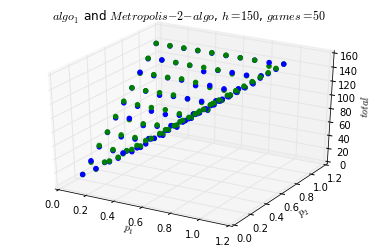

In [19]:
import numpy as np
import time
import os
import sys
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def max(a, b):
    if (a >= b):
        return(a)
    else:
        return(b)

games = 50
summax = 150    
    
fig = plt.figure(figsize=(6.5,4.2))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$p_1$')    
ax.set_ylabel('$p_2$')
ax.set_zlabel('$total$')

a = '$algo_1$ and $Metropolis-2-algo$, $h = {0}$, $games = {1}$'.format(summax, games)
ax.set_title(a)

def algo1(summax, p1, p2, a):   
    w1 = 0
    w2 = 0
    b1 = 0
    b2 = 0
    b = np.zeros((summax, 2))
    i = 0
    while i < summax:
        if (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][b2][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][b2][w2] >= (w2 + 1)/(b2 + 2)*(1 + a[b1][w1][b2 + 1][w2 + 1]) + (b2 - w2 + 1)/(b2 + 2)*a[b1][w1][b2 + 1][w2]:
            b1 = b1 + 1
            x = random.random()
            if x <= p1:
                w1 = w1 + 1
        else:
            b2 = b2 + 1
            x = random.random()
            if x <= p2:
                w2 = w2 + 1
        i = i + 1
    total = w1 + w2
    return(total)

a = np.zeros((summax + 1, summax + 1, summax + 1, summax + 1))
s = summax - 1
while s >= 0:
    b1 = 0
    while b1 <= s:
        w1 = 0
        while w1 <= b1:
            w2 = 0
            while w2 <= s - b1:
                a[b1][w1][s - b1][w2] = max( (w1 + 1)/(b1 + 2)*(1 + a[b1 + 1][w1 + 1][s - b1][w2]) + (b1 - w1 + 1)/(b1 + 2)*a[b1 + 1][w1][s - b1][w2],
                        (w2 + 1)/(s - b1 + 2)*(1 + a[b1][w1][s - b1 + 1][w2 + 1]) + (s - b1 - w2 + 1)/(s - b1 + 2)*a[b1][w1][s - b1 + 1][w2])
                w2 = w2 + 1
            w1 = w1 + 1
        b1 = b1 + 1
    s = s - 1 

games = 50
summax = 150

def rn(p1):
    return random.random() <= p1

def change(cur, cp1, cp2, t):
    if cur == 1 and cp1 >= cp2:
        return 1
    elif cur == 2 and cp2 >= cp1:
        return 2
    else:
        diff = abs(cp2 - cp1)
        if (random.random() <= diff ** t):
            return 3 - cur
        else:
            return cur
        
def func(summax, p1, p2):
    count_1, count_2 = 0, 0
    win_1, win_2 = 0, 0
           
    current_probability_1 = 0
    current_probability_2 = 0
    
    temp = 1
    for i in range(summax):
        num = random.randint(1, 2)
        res = change(num, current_probability_1, current_probability_2, temp)
        if (res == 1):
            count_1 += 1
            if rn(p1):
                win_1 += 1
        else:
            count_2 += 1
            if rn(p2):
                win_2 += 1
        temp *= 0.9
        
        if count_1 == 0:
            current_probability_1 = 1/2
        else:
            current_probability_1 = win_1 / count_1
            
        if count_2 == 0:
            current_probability_2 = 1/2
        else:
            current_probability_2 = win_2 / count_2
        
    return win_1 + win_2 

def error(t, size):
    average = t.mean()
    error = 0
    for i in range(size):
        error += (t[i] - average)**2
    error = error/(size*(size - 1))
    error = 2.8*error**(1/2)
    return(average, error)

p1 = 0.1
while p1 < 1:
    p2 = 0.1
    while p2 < 1:
        total_1 = np.zeros(games)
        for i in range(games):
            total1 = algo1(summax, p1, p2, a)
            total_1[i] = total1
        average1, error1 = error(total_1, games)
        ax.scatter(p1, p2, average1, color = 'green')
                   
        total_1 = np.zeros(games)
        for i in range(games):
            total1 = func(summax, p1, p2)
            total_1[i] = total1
        average1, error1 = error(total_1, games)
        ax.scatter(p1, p2, average1, color = 'blue')
        
        p2 += 0.1
    p1 += 0.1    
    
plt.savefig('algo-1-us-metropolis-algo-distribution-2.png')
plt.show()
